In [193]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objs as go


In [194]:
df = pd.read_csv("Crimes_-_2001_to_Present.csv")

In [195]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725842 entries, 0 to 7725841
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [197]:
df = df.query("Year != 2023")

In [198]:
data = df.isnull().mean().to_frame()
data = data[data[0] > 0].sort_values(0, ascending= False).apply(lambda x: x*100)
data.columns = ["Null Percentage"]
data.style.background_gradient("Reds")

,Null Percentage
Ward,7.975415
Community Area,7.957631
X Coordinate,1.090725
Y Coordinate,1.090725
Latitude,1.090725
Longitude,1.090725
Location,1.090725
Location Description,0.128871
District,0.000610
Case Number,0.000052


In [199]:
# Find the count of unique values in each column
unique_values = df.nunique()

print(unique_values)

ID                      7709279
Case Number             7708742
Date                    3171529
Block                     62617
IUCR                        404
Primary Type                 36
Description                 543
Location Description        215
Arrest                        2
Domestic                      2
Beat                        304
District                     24
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              78982
Y Coordinate             130157
Year                         22
Updated On                 5392
Latitude                 887241
Longitude                886654
Location                 888489
dtype: int64


In [200]:
yearly_trend = df.groupby("Year").count()["ID"]

In [201]:
yearly_trend = yearly_trend.reset_index()
yearly_trend = yearly_trend[yearly_trend["Year"] != 2023]

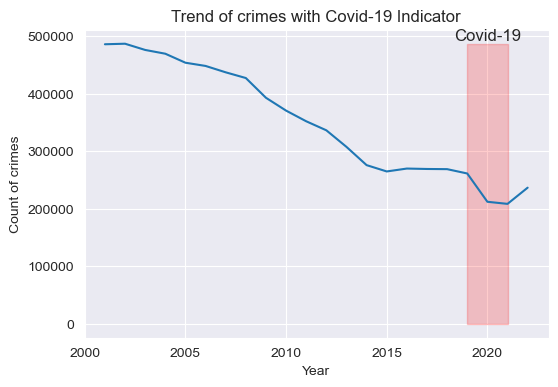

In [202]:



sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(x='Year', y='ID', data=yearly_trend)

ax.fill_betweenx(y=[0, yearly_trend['ID'].max()], x1=2019, x2=2021, color='red', alpha=0.2)

ax.text(2020, yearly_trend['ID'].max(), 'Covid-19', ha='center', va='bottom', fontsize=12)

plt.title('Trend of crimes with Covid-19 Indicator')
plt.ylabel("Count of crimes")
plt.show()


In [203]:
arrest = df["Arrest"].value_counts().reset_index()

In [204]:
arrest

,index,Arrest
0,False,5684368
1,True,2024911


In [235]:
domestic = df["Domestic"].value_counts().reset_index()

In [236]:
domestic

,index,Domestic
0,False,6645776
1,True,1063503


In [205]:
fig = px.pie(arrest, values='Arrest', names='index', title='Arrested or not?',
             width=600, height=400, hole=0.4)

fig.show()

In [237]:
fig = px.pie(domestic, values='Domestic', names='index', title='Domestic or not?',
             width=600, height=400, hole=0.4)

fig.show()

In [242]:
# Group the data by year and calculate the total number of trues, falses and the ratio of trues
df["Date"] = pd.to_datetime(df["Date"])

df_grouped = df.groupby(df['Date'].dt.year).agg({
    'Arrest': [
        'sum',
        lambda x: len(x) - x.sum(),
        lambda x: x.sum() / len(x)
    ],
    'Domestic': [
        'sum',
        lambda x: len(x) - x.sum(),
        lambda x: x.sum() / len(x)
    ]
})


# Reset the index and flatten the multi-level column index
df_grouped.columns = df_grouped.columns.get_level_values(1)
df_grouped.reset_index(inplace=True)

In [244]:
df_grouped.columns = ['Date', 'Total crimes', 'Arrested', 'Ratio arrested', 'Total crimes_2', 'Domestic', 'Ratio domestic']

In [250]:
df_grouped

,Date,Total crimes,Arrested,Ratio arrested,Total crimes_2,Domestic,Ratio domestic,Label
0,2001,141929,343936,29.21,58728,427137,12.09,
1,2002,141563,345236,29.08,61207,425592,12.57,
2,2003,141587,334392,29.75,53844,422135,11.31,
3,2004,144699,324719,30.83,54495,414923,11.61,
4,2005,140920,312847,31.06,50757,403010,11.19,
5,2006,135414,312758,30.21,51349,396823,11.46,
6,2007,131876,305204,30.17,50983,386097,11.66,
7,2008,110009,317151,25.75,50517,376643,11.83,
8,2009,110824,281992,28.21,53050,339766,13.51,
9,2010,100535,269956,27.14,51926,318565,14.02,


In [245]:
df_grouped["Ratio arrested"] = df_grouped["Ratio arrested"].apply(lambda x: np.round(100*x, 2))
df_grouped['Ratio domestic'] = df_grouped['Ratio domestic'].apply(lambda x: np.round(100*x, 2))

In [246]:
colors = []
for date in df_grouped["Date"]:
    if date not in [2019, 2020, 2021]:
        colors.append('')
    else:
        colors.append('Covid-19')

In [247]:
df_grouped["Label"] = colors

In [248]:
fig = px.bar(df_grouped, x='Date', y='Ratio arrested', color = "Label",
             title='Ratio of Arrests by Year')

# Fit a trend line
z = np.polyfit(df_grouped['Date'], df_grouped['Ratio arrested'], 1)
p = np.poly1d(z)

fig.add_trace(go.Scatter(x=df_grouped['Date'], y=p(df_grouped['Date']), mode='lines', line=dict(shape='spline'), name='Trend'))


fig.show()

In [249]:
fig = px.bar(df_grouped, x='Date', y='Ratio domestic', color = "Label",
             title='Ratio of domestic crimes by Year')

# Fit a trend line
z = np.polyfit(df_grouped['Date'], df_grouped['Ratio domestic'], 1)
p = np.poly1d(z)

fig.add_trace(go.Scatter(x=df_grouped['Date'], y=p(df_grouped['Date']), mode='lines', line=dict(shape='spline'), name='Trend'))


fig.show()

In [212]:
to_be_pivoted = df.groupby(["Year" ,"Primary Type"]).count()["ID"].T

In [213]:
to_be_pivoted

Year  Primary Type                     
2001  ARSON                                 1011
      ASSAULT                              31384
      BATTERY                              93458
      BURGLARY                             26014
      CONCEALED CARRY LICENSE VIOLATION        1
                                           ...  
2022  ROBBERY                               8966
      SEX OFFENSE                           1186
      STALKING                               426
      THEFT                                54561
      WEAPONS VIOLATION                     8725
Name: ID, Length: 689, dtype: int64

In [214]:
to_be_pivoted = to_be_pivoted.reset_index()

In [215]:
pivoted = to_be_pivoted.pivot_table(index='Year', columns='Primary Type', values='ID', aggfunc='sum')


In [216]:
mean = pivoted.mean()

In [217]:
mean = mean.sort_values(ascending=False)

In [218]:
top_5 = mean.head(5)

In [219]:
pivoted_top5 = pivoted[top_5.index]

In [220]:
pivoted.index

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64', name='Year')

In [221]:
for col in pivoted_top5.columns:
    print(col)

THEFT
BATTERY
CRIMINAL DAMAGE
NARCOTICS
ASSAULT


In [222]:
for col in pivoted_top5.columns:
    if col != "Year":
        pivoted_top5[col] = pivoted_top5[col].apply(lambda x: np.log(x))

/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_87954/1848880412.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
pivoted_top5 = pivoted_top5.query("Year != 2023")

In [224]:
# Plot the line chart using Plotly express
fig = px.line(pivoted_top5, x=pivoted_top5.index, y=pivoted_top5.columns, title="Line chart of all columns")
# for col in pivoted.columns:
#     fig.add_scatter(x=pivoted.index, y=col, mode='lines', name=col)

fig.show()

In [225]:
location_description = dict(df["Location Description"].value_counts())

In [233]:
top_10 = dict(sorted(location_description.items(), key=lambda item: item[1], reverse=True)[:20])

temp_data = [{"Location": key, "count": value} for key, value in top_10.items()]

In [234]:
# Create the bar chart
fig = px.bar(temp_data, x="count", y="Location", orientation='h', color='count', color_continuous_scale='reds', title='Count of crimes for top 5 locations')

# Show the chart
fig.show()


In [252]:
# Extract properties
df['day_of_week'] = df['Date'].dt.dayofweek
df['day_of_month'] = df['Date'].dt.day
df['day_of_year'] = df['Date'].dt.dayofyear
df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.quarter

In [253]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,day_of_week,day_of_month,day_of_year,month,quarter
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",5,5,248,9,3
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",4,4,247,9,3
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,5,1,244,9,3
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",5,5,248,9,3
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",5,5,248,9,3


In [268]:
# group by quarter using pd.Grouper
quarterly = pd.DataFrame(df.groupby(pd.Grouper(key='Date', freq='Q')).count()["ID"])

In [269]:
quarterly.columns = ["Quarterly"]

In [271]:
# group by quarter using pd.Grouper
monthly = pd.DataFrame(df.groupby(pd.Grouper(key='Date', freq='M')).count()["ID"])

In [272]:
monthly.columns = ["Monthly"]

In [270]:
quarterly

,Quarterly
Date,
2001-03-31,112461
2001-06-30,123660
2001-09-30,130253
2001-12-31,119491
2002-03-31,110914
...,...
2021-12-31,54005
2022-03-31,48930
2022-06-30,58506


In [292]:
merged = quarterly.merge(monthly, on='Date', how='outer')

In [285]:
sns.set_style("whitegrid") # set style to "ggplot"

/Users/ali/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



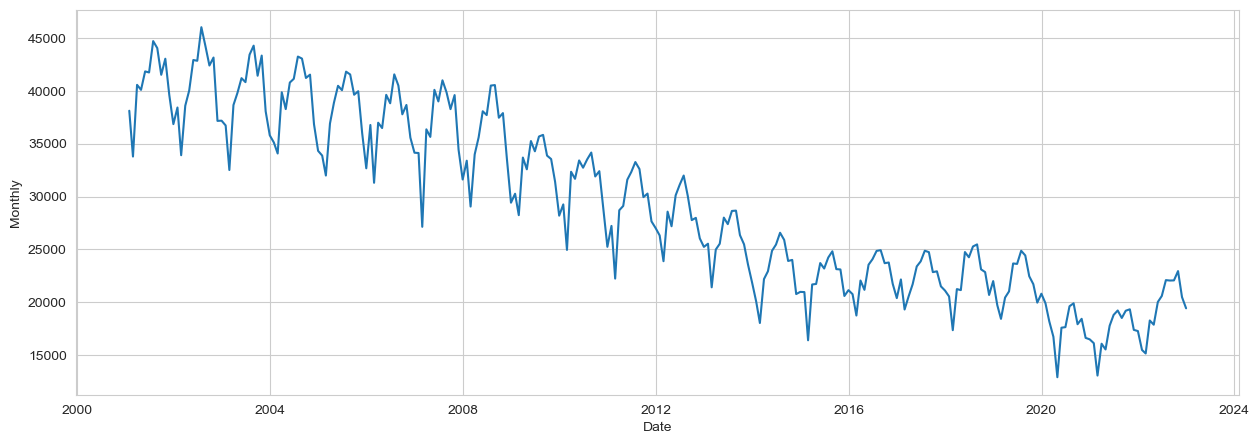

In [303]:
plt.figure(figsize=(15, 5))
sns.lineplot(merged.index, merged["Monthly"])
# sns.lineplot(merged.index, merged["Quarterly"])

plt.show()

/Users/ali/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



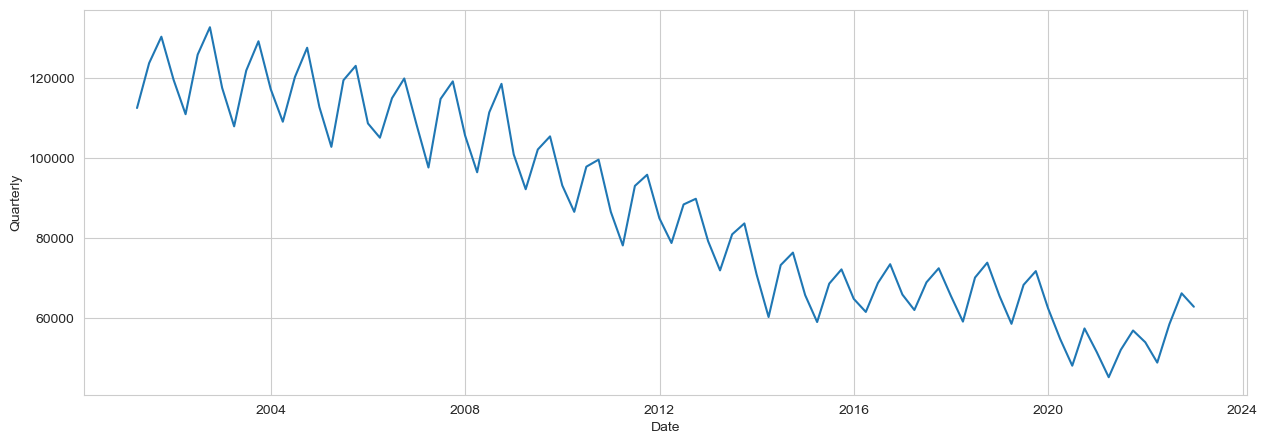

In [304]:
plt.figure(figsize=(15, 5))
sns.lineplot(merged.index, merged["Quarterly"])
# sns.lineplot(merged.index, merged["Quarterly"])

plt.show()